In [2]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline

In [5]:
from pydataset import data
tips = data('tips')

In [6]:
tips.head()

,total_bill,tip,sex,smoker,day,time,size
1,16.99,1.01,Female,No,Sun,Dinner,2
2,10.34,1.66,Male,No,Sun,Dinner,3
3,21.01,3.50,Male,No,Sun,Dinner,3
4,23.68,3.31,Male,No,Sun,Dinner,2
5,24.59,3.61,Female,No,Sun,Dinner,4


In [11]:
df = sns.load_dataset('tips')

In [12]:
from statsmodels.formula.api import ols

In [15]:
regr = ols('tip ~ total_bill', data=df).fit()
df['yhat'] = regr.predict(df.total_bill)
df.head(10)

,total_bill,tip,sex,smoker,day,time,size,yhat
0,16.99,1.01,Female,No,Sun,Dinner,2,2.704636
1,10.34,1.66,Male,No,Sun,Dinner,3,2.006223
2,21.01,3.50,Male,No,Sun,Dinner,3,3.126835
3,23.68,3.31,Male,No,Sun,Dinner,2,3.407250
4,24.59,3.61,Female,No,Sun,Dinner,4,3.502822
5,25.29,4.71,Male,No,Sun,Dinner,4,3.576340
6,8.77,2.00,Male,No,Sun,Dinner,2,1.841335
7,26.88,3.12,Male,No,Sun,Dinner,4,3.743329
8,15.04,1.96,Male,No,Sun,Dinner,2,2.499838
9,14.78,3.23,Male,No,Sun,Dinner,2,2.472532


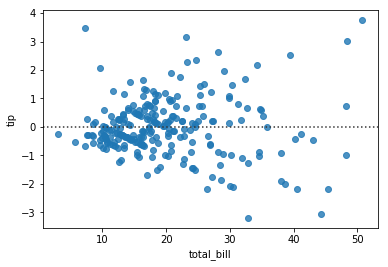

In [18]:
sns.residplot('total_bill', 'tip', data=df)

In [42]:
# from math import sqrt
def regression_errors(y, yhat):
    sse = ((yhat-y)**2).sum()
    ess = ((yhat-y.mean())**2).sum()
    tss = sse + ess
    mse = sse / len(y)
    rmse = mse**.5
    return sse, ess, tss, mse, rmse

In [24]:
%timeit regression_errors(df.tip, df.yhat)

495 µs ± 23.1 µs per loop (mean ± std. dev. of 7 runs, 1000 loops each)


In [27]:
from sklearn.metrics import mean_squared_error
def regression_errors(y, yhat):
    mse = mean_squared_error(y, yhat)
    sse = mse * len(y)
    ess = ((yhat-y.mean())**2).sum()
    tss = sse + ess
    rmse = mse ** .5
    df_eval = pd.DataFrame(np.array(['sse','ess','tss','mse','rmse']), columns=['metric'])
    df_eval['model_error'] = np.array([sse, ess, tss, mse, rmse])
    return df_eval

In [28]:
%timeit regression_errors(df.tip, df.yhat)

1.05 ms ± 39.6 µs per loop (mean ± std. dev. of 7 runs, 1000 loops each)


In [30]:
df_eval = regression_errors(df.tip, df.yhat)

In [34]:
(df_eval[df_eval.metric == 'ess'].model_error.sum())/(df_eval[df_eval.metric == 'tss'].model_error.sum())

0.4566165863516764

In [35]:
df_eval

,metric,model_error
0,sse,252.788744
1,ess,212.423733
2,tss,465.212477
3,mse,1.036019
4,rmse,1.017850


In [36]:
df['tip_baseline'] = df['tip'].mean()

In [37]:
df['tip_baseline_med'] = df['tip'].median()

In [38]:
df_eval2 = regression_errors(df.tip, df.tip_baseline_med)

In [39]:
df_eval2

,metric,model_error
0,sse,467.569200
1,ess,2.356723
2,tss,469.925923
3,mse,1.916267
4,rmse,1.384293


In [40]:
df_eval3 = regression_errors(df.tip, df.tip_baseline)

In [41]:
df_eval3

,metric,model_error
0,sse,465.212477
1,ess,0.000000
2,tss,465.212477
3,mse,1.906609
4,rmse,1.380800


In [44]:
sse, ess, tss, mse, rmse = regression_errors(df.tip, df.yhat)
sse_bl, ess_bl, tss_bl, mse_bl, rmse_bl = regression_errors(df.tip, df.tip_baseline)
def better_than_baseline(sse, sse_bl):
    return sse < sse_bl
    

In [45]:
better_than_baseline(sse, sse_bl)

True

In [50]:

r2 = regr.ess/regr.centered_tss
r_pval = regr.f_pvalue
r2 = regr.rsquared

In [51]:
r2, r_pval

(0.45661658635167657, 6.692470646863209e-34)

In [52]:
regr.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                    tip   R-squared:                       0.457
Model:                            OLS   Adj. R-squared:                  0.454
Method:                 Least Squares   F-statistic:                     203.4
Date:                Tue, 15 Oct 2019   Prob (F-statistic):           6.69e-34
Time:                        10:29:36   Log-Likelihood:                -350.54
No. Observations:                 244   AIC:                             705.1
Df Residuals:                     242   BIC:                             712.1
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept      0.9203      0.160      5.761      0.000       0.606       1.235
total_bill     0.1050      0.007     14.260      0.000       0.091       0.120
==============================================================================
Omnibus:                       20.185   Durbin-Watson:                   2.151
Prob(Omnibus):                  0.000   Jarque-Bera (JB):               37.750
Skew:                           0.443   Prob(JB):                     6.35e-09
Kurtosis:                       4.711   Cond. No.                         53.0
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""